## Question 1
The following table indicates the number of 6-point scores in an American rugby match in the 1979 season.

![](table1.png)

Based on these results, we create a Poisson distribution with the sample mean parameter  = 2.435. Is there any reason to believe that at a .05 level the number of scores is a Poisson variable?

In [2]:
# import libraries
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chisquare
from scipy.stats import norm
from scipy.stats import kstest

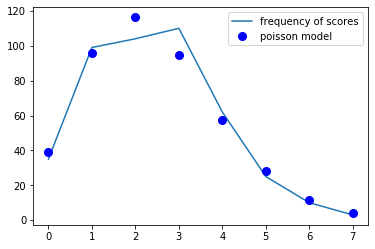

In [5]:
# your answer here
mu = 2.435

mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

scores = [0, 1, 2, 3, 4, 5, 6, 7]
number_times = [35, 99, 104, 110, 62, 25, 10, 3]

# poisson distribution
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.999, mu))
y = poisson.pmf(x, mu) * sum(number_times)
#print(x)

# create plots
plt.plot(scores, number_times, label = 'frequency of scores')
plt.plot(x, y, 'bo', ms = 8, label = 'poisson model')
plt.legend()
plt.show()

In [8]:
# as it is a discrete distribution, I used the Chi-square test
# H0: follows a poisson distribution
# H1: does not follow a Poisson distribution

observed_values = number_times
expected_values = y #poisson.pmf(x, mu) * sum(times)

chisquare(observed_values, f_exp = expected_values)

# The first value in the returned tuple is the chi-square value itself, while the second value is the p-value

Power_divergenceResult(statistic=5.526588649191276, pvalue=0.5959787428784398)

In [11]:
pvalue = chisquare(observed_values, f_exp = expected_values)[1]
print(pvalue)

if pvalue <= 0.05:
    print("reject the null hypothesis")
else:
    print("don't reject the null hypothesis")

0.5959787428784398
don't reject the null hypothesis


In [12]:
'''
Null hypothesis: the number of scores follows a Poisson distribution.
As seen above, we can't reject the null hypothesis and therefore the 
number of scores is a poisson variable.
'''

"\nNull hypothesis: the number of scores follows a Poisson distribution.\nAs seen above, we can't reject the null hypothesis and therefore the \nnumber of scores is a poisson variable.\n"

In [ ]:
'''
1 - observed values
2 - model
3 - stats.chisquare(observed_values, exp = model)

p < 0.05 :)
p > 0.05 :(
'''

#theoretical probabilities
probs = [poisson.pmf(i,mu) for i in range(n_scores -1)]
probs.append(1- sum(probs))

# expected frequencies
f_exp = [p * total_times for p in probs] ##1 is the standardized total_times

##other option
 dof = n_scores - 1 - 1

# chi squared value

## Question 2
The following are the ordered values of a random sample of SAT scores (university entrance exam) for several students: 852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063. In previous years, the scores were presented by N (985,50). Based on the sample, is there any reason to believe that there has been a change in the distribution of scores this year? Use the level alpha = 0.05. 

In [7]:
#your answer here
# H0: there has been a change in the distribution
# H1: there has not been a change in the distribuition

SAT_scores = [852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063]
total = sum(SAT_scores)
n = len(SAT_scores)

# N(985,50) - mean and std for the expected values
# alpha = 0.05


In [8]:
# create the model
n = norm(loc = 985, scale = 50)

In [9]:
# as it is a continuous distribution, I used the KS test
# H0: there has been a change in the distribution
# H1: there has not been a change in the distribuition
pvalue = kstest(SAT_scores, n.cdf)[1]
print(pvalue)

if pvalue <= 0.05:
    print("reject the null hypothesis")
else:
    print("don't reject the null hypothesis")
    
# ks works on the cumulative distribution

0.847406396427736
don't reject the null hypothesis


In [47]:
'''
Null hypothesis: the number has been a change in the distribution.
As seen above, we can't reject the null hypothesis and therefore there has been 
a change in the distribution.
'''

"\nNull hypothesis: the number has been a change in the distribution.\nAs seen above, we can't reject the null hypothesis and therefore there has been \na change in the distribution.\n"

## Question 3
Let's analyze a discrete distribution. To analyze the number of defective items in a factory in the city of Medellín, we took a random sample of n = 60 articles and observed the number of defectives in the following table:

![](table4.png)

A poissón distribution was proposed since it is defined for x = 0,1,2,3, .... using the following model:

![](image1.png)

Does the distribution of defective items follow this distribution?

In [32]:
# your code here
scores = [0,1,2]#3,4]
times = [32,15,9]#,4]
n_scores = len(scores)
total_times = sum(times)
mu = sum(times[i] * i for i in scores) / total_times
alpha = 0.05

#theoretical probabilities
probs = [poisson.pmf(i,mu) for i in range(n_scores - 1)]
probs.append(1 - sum(probs))

#expected frequencies
f_exp = [p * total_times for p in probs]


'''
# because chi squared tests don't consider frequencies lower than 5, we don't consider the 4
def_items = [0,1,3]
observed_freq = np.array([32,15,9])

# calculate mean
mu = observed_freq.mean()
print(mu)

# poisson distribution
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
y = poisson.pmf(x,mu) * sum(observed_freq)
'''


"\n# because chi squared tests don't consider frequencies lower than 5, we don't consider the 4\ndef_items = [0,1,3]\nobserved_freq = np.array([32,15,9])\n\n# calculate mean\nmu = observed_freq.mean()\nprint(mu)\n\n# poisson distribution\nx = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))\ny = poisson.pmf(x,mu) * sum(observed_freq)\n"

In [33]:
chisquare(times, f_exp=f_exp)

Power_divergenceResult(statistic=1.4726967552012993, pvalue=0.47885934025851884)

In [36]:
'''plt.plot(def_items, observed_freq, label = 'frequency of defective items')
plt.plot(x, y, 'bo', ms = 8, label = 'poisson model')
plt.legend()
plt.show()
'''

"plt.plot(def_items, observed_freq, label = 'frequency of defective items')\nplt.plot(x, y, 'bo', ms = 8, label = 'poisson model')\nplt.legend()\nplt.show()\n"

In [37]:
'''# as it is a discrete distribution, I used the Chi-square test
# H0: follows a poisson distribution
# H1: does not follow a Poisson distribution

observed_values = observed_freq
expected_values = y

chisquare(observed_values, f_exp = expected_values)
#print(observed_values)
#print(expected_values)
'''

'# as it is a discrete distribution, I used the Chi-square test\n# H0: follows a poisson distribution\n# H1: does not follow a Poisson distribution\n\nobserved_values = observed_freq\nexpected_values = y\n\nchisquare(observed_values, f_exp = expected_values)\n#print(observed_values)\n#print(expected_values)\n'

In [38]:
'''pvalue = chisquare(observed_values, f_exp = expected_values)[1]
print(pvalue)

if pvalue <= 0.05:
    print("reject the null hypothesis")
else:
    print("don't reject the null hypothesis")
'''

'pvalue = chisquare(observed_values, f_exp = expected_values)[1]\nprint(pvalue)\n\nif pvalue <= 0.05:\n    print("reject the null hypothesis")\nelse:\n    print("don\'t reject the null hypothesis")\n'

In [79]:
'''
Null hypothesis: the number of defective items follows a Poisson distribution.
As seen above, we can reject the null hypothesis and therefore the 
number of defective items doesn't follow a poisson distribution.
'''

"\nNull hypothesis: the number of defective items follows a Poisson distribution.\nAs seen above, we can reject the null hypothesis and therefore the \nnumber of defective items doesn't follow a poisson distribution.\n"

## Question 4
A quality control engineer takes a sample of 10 tires that come out of an assembly line, and would like to verify on the basis of the data that follows, if the number of tires with defects observed over 200 days, if it is true that 5% of all tires have defects (that is, if the sample comes from a binomial population with n = 10 and p = 0.05). 

![](table6.png)


In [48]:
# your answer here
# H0: the sample comes from a binomial population with n = 10 and p = 0.05
# H1: does not follow a binomial distribution with those characteristics

from scipy.stats import binom

# generate the observed data
samples = [138, 53, 9]
defective = list(range(len(samples)))
total_samples = sum(samples)
n = 10
p = 0.05
#k = 

#theoretical probabilities
probs = [binom.pmf(k,n,p) for k in range(len(defective) - 1)]
probs.append(1 - sum(probs))

#expected frequencies
f_exp_4 = [p * total_samples for p in probs]


In [49]:
chisquare(samples, f_exp=f_exp_4)

Power_divergenceResult(statistic=8.30617951954273, pvalue=0.015715783395951474)

In [50]:
pvalue = chisquare(samples, f_exp=f_exp_4)[1]

if pvalue <= 0.05:
    print("reject the null hypothesis")
else:
    print("don't reject the null hypothesis")

reject the null hypothesis


## Question 5
A researcher gathers information about the patterns of physical activity (AF) of children in the fifth grade of primary school of a public school. He defines three categories of physical activity (1 = Low, 2 = Medium, 3 = High). He also inquires about the regular consumption of sugary drinks at school, and defines two categories (1 = consumed, 0 = not consumed). We would like to evaluate if there is an association between patterns of physical activity and the consumption of sugary drinks for the children of this school, at a level of 5% significance. The results are in the following table: 

![](table5.png)

In [51]:
#your answer here
'''
event A = sugary drinks
event B = physical activity

the definition of independence is P(A&&B)(union) = P(A) * P(B)

P(A&&B) = [32,12,14,22,6,9]
P(B) = [44,36,15]
P(A) = [52,43]

we need to do the chi-test between the curves of each point

model P(A) * P(B) = [[(52*44)/95,(43*44)/95],[(52*36)/95,(43*36)/95],[...]]

'''

'\nevent A = sugary drinks\nevent B = physical activity\n\nthe definition of independence is P(A&&B)(union) = P(A) * P(B)\n\nP(A&&B) = [32,12,14,22,6,9]\nP(B) = [44,36,15]\nP(A) = [52,43]\n\nwe need to do the chi-test between the curves of each point\n\nmodel P(A) * P(B) = [[(52*44)/95,(43*44)/95],[(52*36)/95,(43*36)/95],[...]]\n\n'

In [52]:
import pandas as pd



#indipendent = model